# Predicting House Prices by Regression Analysis

Dataset used: Boston Housing Dataset

Method used: A basic Deep Neural Network model

## 1. Importing the required libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

## 2. Loading Data

In [14]:
#The boston housing dataset can be loaded from the sklearn dataset library.
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [15]:
#This dataset is loaded into a dataframe now.
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#The price column is added in the dataframe.
data['MEDV'] = boston_dataset.target

## 3. Data Preprocessing

In [17]:
#Check if there are any missing values in the dataset.
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 4. Exploratory Data Analysis

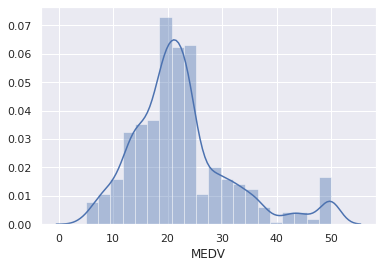

In [18]:
#Plotting the distribution of MEDV price over the data range.
sns.set()
sns.distplot(data['MEDV'], bins=20)
plt.show()

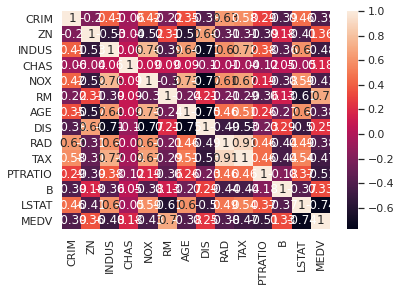

In [19]:
#Plotting a correlation matrix to ensure linear relationship between different features.
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

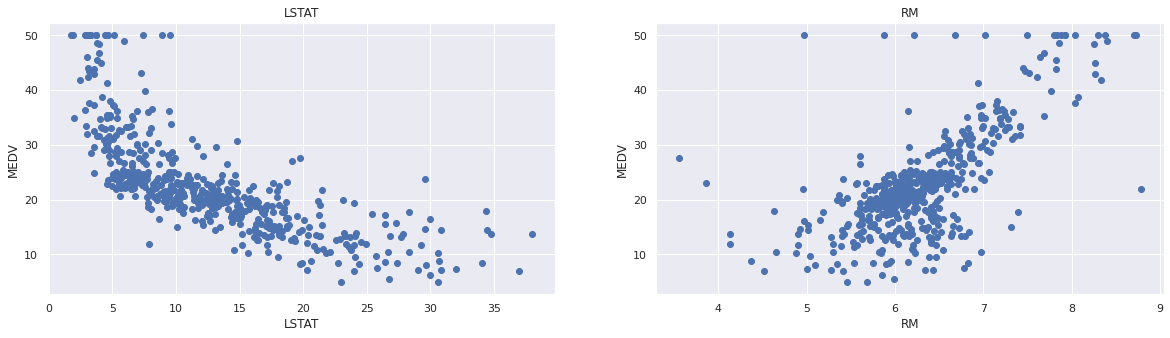

In [20]:
#Scatter plot for selected features RM and LSTAT
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## 5. Preparing data for training

In [21]:
# Normalizing the data
data_norm = (data - data.mean()) / data.std()
data_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [22]:
# Creating X and Y for training model.
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [23]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## 6. Creating Model

In [24]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (2,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


## 7. Training the model

In [25]:
# Defining callback
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

#Prediction on untrained model for comparision.
preds_on_untrained = model.predict(X_test)

#Fitting the model for given data
history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs = 1000, 
    callbacks = [early_stopping]
)

Epoch 1/1000
13/13 [==============================] - 0s 12ms/step - loss: 772.1202 - val_loss: 752.7568
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 714.7289 - val_loss: 702.0106
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 666.4233 - val_loss: 659.7700
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 628.3247 - val_loss: 630.9998
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 602.0593 - val_loss: 610.1207
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 577.0800 - val_loss: 582.2657
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 543.5516 - val_loss: 546.2397
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 506.0398 - val_loss: 509.3612
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 467.6990 - val_loss: 470.8975
Epoch 10/1000
13/13 [==============================] - 0s 3ms/s

## 8. Model Evaluation

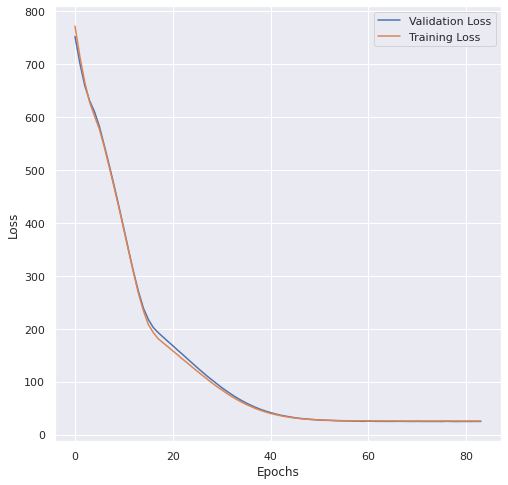

In [26]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return
plot_loss(history)

## 9. Predictions

In [27]:
# Predictions on trained model
preds_on_trained = model.predict(X_test)

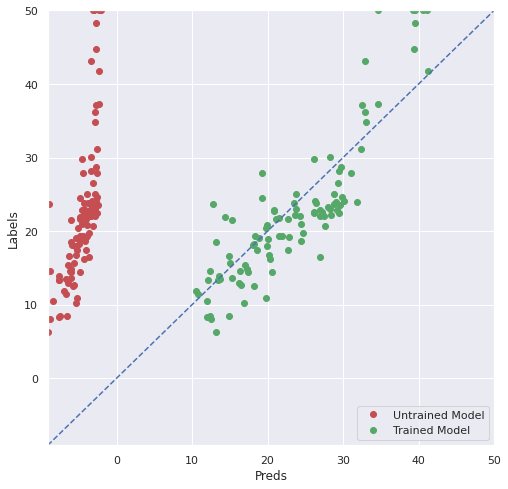

In [30]:
#Comparision
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, Y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, Y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(Y_test), min(preds1), min(preds2))
    y_max = max(max(Y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return
compare_predictions(preds_on_untrained, preds_on_trained, Y_test)